In [1]:
#PROJECT 
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(color_codes=True)

In [2]:
#read in train and test files
train = pd.read_csv("bike-sharing-demand/train.csv")
test = pd.read_csv("bike-sharing-demand/test.csv")

#view data
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [3]:
train.describe() #view extra data

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [4]:
train.isnull().sum() #check for nulls (data imputation)

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

In [5]:
train.dtypes #checking type of each field

datetime       object
season          int64
holiday         int64
workingday      int64
weather         int64
temp          float64
atemp         float64
humidity        int64
windspeed     float64
casual          int64
registered      int64
count           int64
dtype: object

In [6]:
#will show means of different weather info such as temp and humidity
weather_info = train.groupby(['season'], as_index = False).weather.mean() #find mean of weather in all seasons
weather_info['temp'] = train.groupby(['season'], as_index = False).temp.mean().temp#find mean of humidity in all seasons
weather_info['humidity'] = train.groupby(['season'], as_index = False).humidity.mean().humidity#find mean of humidity in all seasons
weather_info

,season,weather,temp,humidity
0,1,1.424423,12.530491,56.297841
1,2,1.422978,22.823483,60.852909
2,3,1.366630,28.789111,64.123674
3,4,1.459766,16.649239,66.173738


In [38]:
users = train.groupby(['season'], as_index=False).registered.sum() #how many registered users per season
users['casual'] = train.groupby(['season'], as_index=False).casual.sum().casual #how many casual users per season
users

,season,registered,casual
0,1,270893,41605
1,2,458610,129672
2,3,497944,142718
3,4,465894,78140


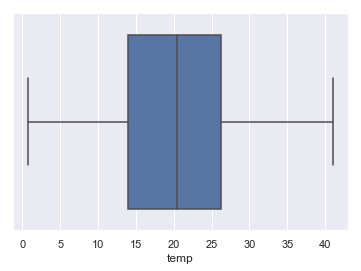

In [8]:
sns.boxplot(x = train["temp"]) #view temperature as a boxplot

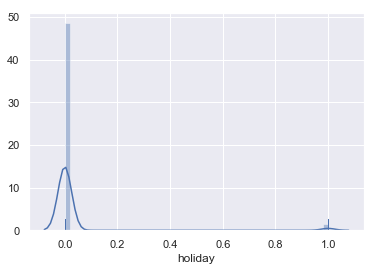

In [18]:
sns.distplot(train['holiday'], rug = True)

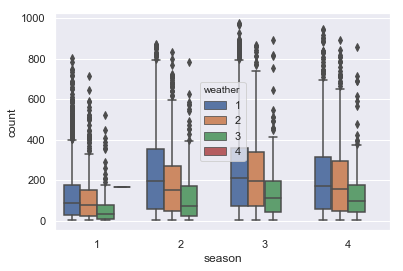

In [31]:
sns.boxplot(x="season", y="count", hue="weather", data = train)

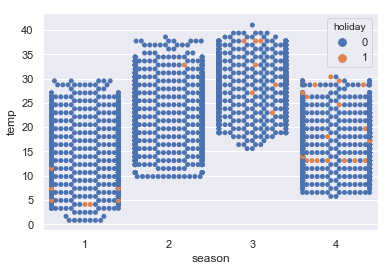

In [34]:
sns.swarmplot(x="season", y="temp", hue="holiday", data=train)